<a href="https://colab.research.google.com/github/paulo-antunes-1/paulo-antunes-atmospheric-data/blob/main/BurnedArea_PM25/Burned_Area_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install netCDF4
!pip install numpy
!pip install xarray
!pip install geopandas
!pip install cartopy
!pip install matplotlib
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 67.4 MB/s eta 0:00:00


In [ ]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from shapely.geometry import Point
import contextily as ctx

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [ ]:
#Abrindo arquivos .csv e criando Data Frames
bdqueimadas = pd.read_csv('/content/drive/MyDrive/QMODIS/rafi.csv') #Aqui para apenas para as primeiras figuras
bdqueimadas1 = pd.read_csv('/content/drive/MyDrive/QMODIS/rafi.csv') #Aqui para as demais figuras

In [ ]:
#Abrindo arquivos .json para estados e municipios do brasil
estados = gpd.read_file("/content/drive/MyDrive/QMODIS/br_states.json") #Estados
municipios = gpd.read_file("/content/drive/MyDrive/QMODIS/mun.json") #Municipios

In [ ]:
#Transformando a coluna Datahora em formato datetime

bdqueimadas['date'] = pd.to_datetime(bdqueimadas['date'])
bdqueimadas.set_index('date', inplace=True)

In [ ]:
bdqueimadas_2024 = bdqueimadas['2024-01-01':'2024-12-31']
bdqueimadas_2005 = bdqueimadas['2005-01-01':'2005-12-31']
bdqueimadas_2007 = bdqueimadas['2007-01-01':'2007-12-31']
bdqueimadas_2010 = bdqueimadas['2010-01-01':'2010-12-31']
bdqueimadas_2015 = bdqueimadas['2015-01-01':'2015-12-31']
bdqueimadas_2017 = bdqueimadas['2017-01-01':'2017-12-31']
bdqueimadas_2019 = bdqueimadas['2019-01-01':'2019-12-31']
bdqueimadas_2023 = bdqueimadas['2023-01-01':'2023-12-31']

In [ ]:
# Utilizando os dados os dados de bdqueimadas como dataframe
df = bdqueimadas

# Converter a coluna 'date' para formato datetime
df['date'] = pd.to_datetime(df['date'])

# Criar uma nova coluna com o ano
df['year'] = df['date'].dt.year

# Separar os dados por ano em um dicionário
dados_por_ano = {ano: grupo for ano, grupo in df.groupby('year')}

# Exibir resumo: quantos registros há por ano
for ano, grupo in dados_por_ano.items():
    print(f"Ano: {ano}, Total de registros: {len(grupo)}")

# Exemplo: acessar os dados do ano de 2005
df_2005 = dados_por_ano.get(2005)
if df_2005 is not None:
    print(df_2005.head())
else:
    print("Não há dados para o ano de 2005.")

Ano: 1998, Total de registros: 123899
Ano: 1999, Total de registros: 134619
Ano: 2000, Total de registros: 101540
Ano: 2001, Total de registros: 145497
Ano: 2002, Total de registros: 321523
Ano: 2003, Total de registros: 341539
Ano: 2004, Total de registros: 380758
Ano: 2005, Total de registros: 362903
Ano: 2006, Total de registros: 249439
Ano: 2007, Total de registros: 394245
Ano: 2008, Total de registros: 212220
Ano: 2009, Total de registros: 155325
Ano: 2010, Total de registros: 319735
Ano: 2011, Total de registros: 158484
Ano: 2012, Total de registros: 217658
Ano: 2013, Total de registros: 128466
Ano: 2014, Total de registros: 176384
Ano: 2015, Total de registros: 217242
Ano: 2016, Total de registros: 184744
Ano: 2017, Total de registros: 208099
Ano: 2018, Total de registros: 133378
Ano: 2019, Total de registros: 198122
Ano: 2020, Total de registros: 223208
Ano: 2021, Total de registros: 184585
Ano: 2022, Total de registros: 201252
Ano: 2023, Total de registros: 190438
Ano: 2024, T

In [ ]:
# Criar uma pasta para os arquivos de saída, se ainda não existir
output_dir = "dados_por_ano"
os.makedirs(output_dir, exist_ok=True)

# Salvar cada grupo de dados (por ano) em um arquivo separado
for ano, grupo in dados_por_ano.items():
    output_path = os.path.join(output_dir, f"dados_{ano}.csv")
    grupo.to_csv(output_path, index=False)
    print(f"Arquivo salvo: {output_path}")


Arquivo salvo: dados_por_ano/dados_1998.csv
Arquivo salvo: dados_por_ano/dados_1999.csv
Arquivo salvo: dados_por_ano/dados_2000.csv
Arquivo salvo: dados_por_ano/dados_2001.csv
Arquivo salvo: dados_por_ano/dados_2002.csv
Arquivo salvo: dados_por_ano/dados_2003.csv
Arquivo salvo: dados_por_ano/dados_2004.csv
Arquivo salvo: dados_por_ano/dados_2005.csv
Arquivo salvo: dados_por_ano/dados_2006.csv
Arquivo salvo: dados_por_ano/dados_2007.csv
Arquivo salvo: dados_por_ano/dados_2008.csv
Arquivo salvo: dados_por_ano/dados_2009.csv
Arquivo salvo: dados_por_ano/dados_2010.csv
Arquivo salvo: dados_por_ano/dados_2011.csv
Arquivo salvo: dados_por_ano/dados_2012.csv
Arquivo salvo: dados_por_ano/dados_2013.csv
Arquivo salvo: dados_por_ano/dados_2014.csv
Arquivo salvo: dados_por_ano/dados_2015.csv
Arquivo salvo: dados_por_ano/dados_2016.csv
Arquivo salvo: dados_por_ano/dados_2017.csv
Arquivo salvo: dados_por_ano/dados_2018.csv
Arquivo salvo: dados_por_ano/dados_2019.csv
Arquivo salvo: dados_por_ano/dad

In [ ]:
# 1. Utilizando os dados apenas de um ano expecificos
df = bdqueimadas_2023

# 2. Preparar os dados
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# 3. Juntar os pontos com os estados (associar coordenadas aos estados)
gdf_com_estado = gpd.sjoin(gdf, estados, how="inner", predicate="intersects")

# 4. Verifique o nome da coluna que contém o nome do estado
print(gdf_com_estado.columns)  # Descubra se é 'name', 'NM_ESTADO', 'estado', etc.

# 5. Agrupar por estado e somar a coluna 'count'
# Substitua 'name' pelo nome correto da coluna de estado, se necessário
contagem_por_estado = gdf_com_estado.groupby('SIGLA').count()['count'].sort_values(ascending = True).nlargest(n=10)

# 6. Exibir o resultado
print("Total de casos por estado:")
print(contagem_por_estado)


<ipython-input-11-2ca7cfe4b7fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


Index(['latitude', 'longitude', 'satelite', 'count', 'geometry', 'index_right',
       'id', 'FID_Export', 'SIGLA', 'Total', 'Homens', 'Mulheres', 'Urbana',
       'Rural', 'TX_Alfab', 'FID_estado', 'Estado', 'FK_macro', 'PK_sigla'],
      dtype='object')
Total de casos por estado:
SIGLA
PA    41803
MT    21736
MA    21117
AM    19655
PI    12952
BA    11923
TO     9642
RO     7418
CE     6838
AC     6560
Name: count, dtype: int64


In [ ]:
# 1. Preparar os dados
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# 2. Juntar os pontos com os estados (associar coordenadas aos estados)
gdf_com_municipios = gpd.sjoin(gdf, municipios, how="inner", predicate="intersects")

# 3. Verifique o nome da coluna que contém o nome do estado
print(gdf_com_municipios.columns)  # Descubra se é 'name', 'NM_ESTADO', 'estado', etc.

# 4. Agrupar por estado e somar a coluna 'count'
# Substitua 'name' pelo nome correto da coluna de estado, se necessário
contagem_por_municipios = gdf_com_municipios.groupby('name')['count'].sum().sort_values(ascending = True).nlargest(n=10)


# 5. Exibir o resultado
print("Total de casos por municipios:")
print(contagem_por_municipios)


<ipython-input-13-4d0e338f236c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


Index(['latitude', 'longitude', 'satelite', 'count', 'geometry', 'index_right',
       'id', 'name', 'description'],
      dtype='object')
Total de casos por municipios:
name
Altamira              3553
São Félix do Xingu    2897
Porto Velho           2500
Lábrea                2429
Poconé                2367
Apuí                  2132
Portel                2010
Corumbá               1798
Novo Aripuanã         1732
Santarém              1728
Name: count, dtype: int64


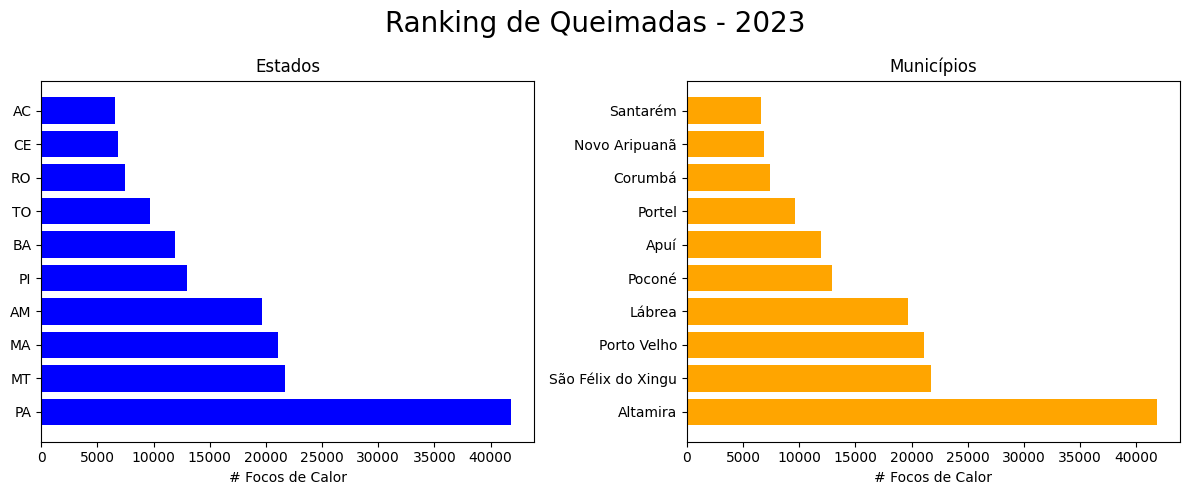

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2, sharex=False, sharey=False)

# a)
# Use the index of the Series for labels and the values for the counts for the first subplot
ax[0].barh(contagem_por_estado.index, contagem_por_estado.values, color='blue')
ax[0].set_ylabel('')
ax[0].set_title('Estados')

# The second subplot using contagem_especifica (which is a Series, so index are labels and values are counts)
ax[1].barh(contagem_por_municipios.index, contagem_por_estado.values, color='orange')
ax[1].set_ylabel('')
ax[1].set_title('Municípios')

# parâmetros universais de formatação
fig.suptitle('Ranking de Queimadas - 2023', fontsize=20)
ax[0].set_xlabel('# Focos de Calor')
ax[1].set_xlabel('# Focos de Calor')

plt.tight_layout()
plt.show()

In [ ]:
print("Entradas no GeoDataFrame original:", len(gdf))
print("Entradas após o spatial join:", len(gdf_estados))


Entradas no GeoDataFrame original: 12925
Entradas após o spatial join: 12924


In [ ]:
print(rafi[['latitude', 'longitude']].describe())


           latitude     longitude
count  5.678227e+06  5.678227e+06
mean  -1.024515e+01 -5.162422e+01
std    6.168043e+00  7.414730e+00
min   -3.374046e+01 -7.367400e+01
25%   -1.326000e+01 -5.644300e+01
50%   -9.607000e+00 -5.077100e+01
75%   -5.926670e+00 -4.591200e+01
max    5.155660e+00 -3.480900e+01


In [ ]:
# Verificar coordenadas
print("Coordenadas:")
print(rafi[['latitude', 'longitude']].describe())

# Verificar nomes de colunas do GeoJSON
print("\nColunas do GeoDataFrame dos estados:")
print(estados.columns)

# Spatial join
print("\nRealizando o spatial join...")
gdf_estados = gpd.sjoin(gdf, estados, how='inner', predicate='within')
print("Pontos associados a estados:", len(gdf_estados))

# Médias
media_por_mes_estado = gdf_estados.groupby([nome_coluna_estado, 'month'])['count'].mean().reset_index()
media_total_estado = media_por_mes_estado.groupby(nome_coluna_estado)['count'].mean().reset_index()
media_total_estado.rename(columns={'count': 'media_mensal_count'}, inplace=True)

print("\nMédias mensais por estado:")
print(media_total_estado.head())


Coordenadas:
           latitude     longitude
count  5.678227e+06  5.678227e+06
mean  -1.024515e+01 -5.162422e+01
std    6.168043e+00  7.414730e+00
min   -3.374046e+01 -7.367400e+01
25%   -1.326000e+01 -5.644300e+01
50%   -9.607000e+00 -5.077100e+01
75%   -5.926670e+00 -4.591200e+01
max    5.155660e+00 -3.480900e+01

Colunas do GeoDataFrame dos estados:
Index(['id', 'FID_Export', 'SIGLA', 'Total', 'Homens', 'Mulheres', 'Urbana',
       'Rural', 'TX_Alfab', 'FID_estado', 'Estado', 'FK_macro', 'PK_sigla',
       'geometry', 'media_mensal_count'],
      dtype='object')

Realizando o spatial join...
Pontos associados a estados: 12924

Médias mensais por estado:
  SIGLA  media_mensal_count
0    AC                 1.0
1    AL                 1.0
2    AM                 1.0
3    AP                 1.0
4    BA                 1.0


In [ ]:
print(media_total_estado)

   SIGLA  media_mensal_count
0     AC                 1.0
1     AL                 1.0
2     AM                 1.0
3     AP                 1.0
4     BA                 1.0
5     CE                 1.0
6     DF                 1.0
7     ES                 1.0
8     GO                 1.0
9     MA                 1.0
10    MG                 1.0
11    MS                 1.0
12    MT                 1.0
13    PA                 1.0
14    PB                 1.0
15    PE                 1.0
16    PI                 1.0
17    PR                 1.0
18    RJ                 1.0
19    RN                 1.0
20    RO                 1.0
21    RR                 1.0
22    RS                 1.0
23    SC                 1.0
24    SE                 1.0
25    SP                 1.0
26    TO                 1.0


In [ ]:
print(gdf_estados['count'].value_counts())
print(gdf_estados['count'].unique())


count
1    12924
Name: count, dtype: int64
[1]


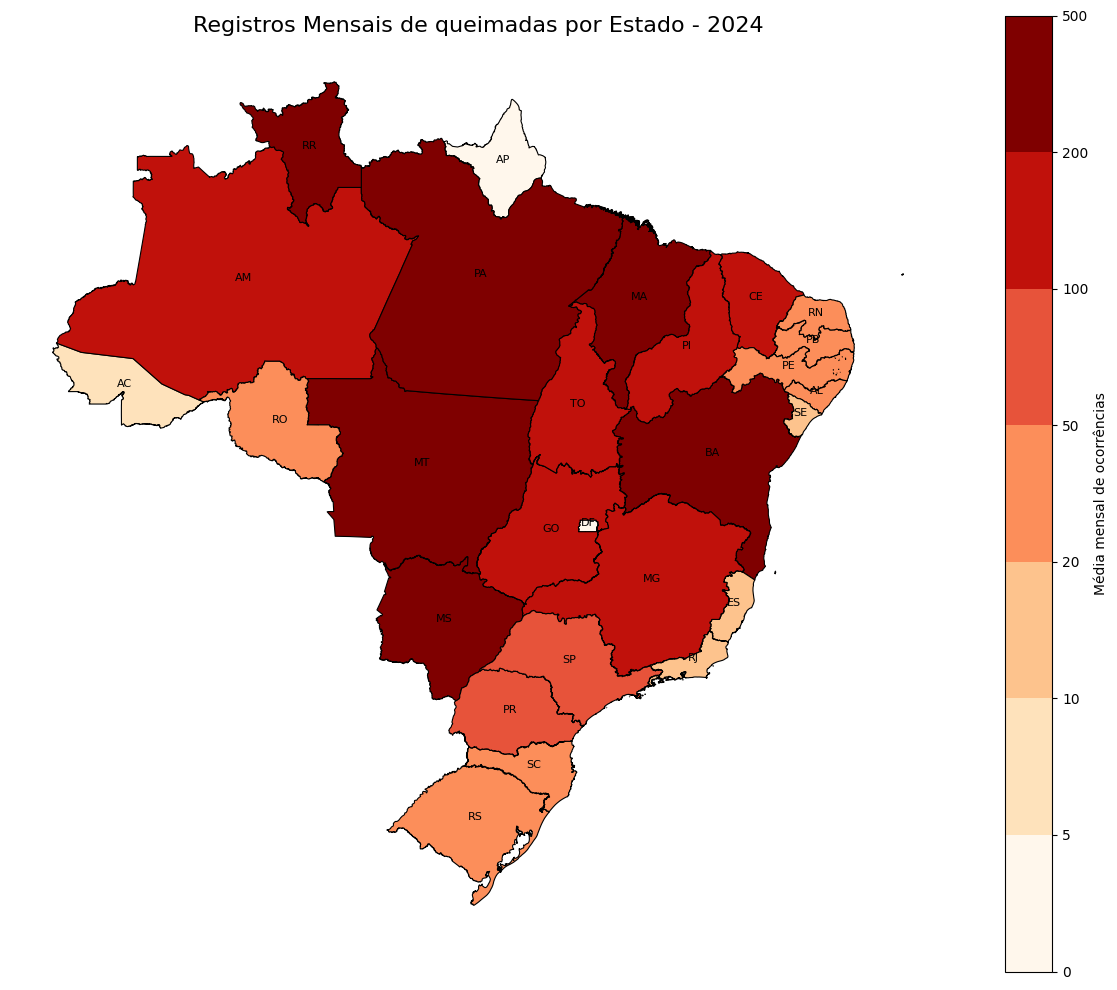

In [ ]:
# === 1. Carregar dados ===
rafi = bdqueimadas1
rafi['date'] = pd.to_datetime(rafi['date'])

# Carregar GeoJSON dos estados brasileiros
estados = estados  # Substitua pelo caminho correto do seu arquivo GeoJSON
estados = estados.to_crs(epsg=4326)

# === 2. Filtrar apenas dados do ano de 2024 ===
rafi_2024 = rafi[rafi['date'].dt.year == 2024].copy()
rafi_2024['month'] = rafi_2024['date'].dt.month

# Criar geometria de pontos
rafi_2024['geometry'] = gpd.points_from_xy(rafi_2024['longitude'], rafi_2024['latitude'])
gdf = gpd.GeoDataFrame(rafi_2024, geometry='geometry', crs="EPSG:4326")

# === 3. Associar cada ponto a um estado via spatial join ===
nome_coluna_estado = 'SIGLA'  # Nome correto da coluna com a sigla dos estados
gdf_estados = gpd.sjoin(gdf, estados, how='inner', predicate='within')

# === 4. Contar número de ocorrências por estado e mês ===
media_por_mes_estado = gdf_estados.groupby([nome_coluna_estado, 'month']).size().reset_index(name='count')

# === 5. Calcular média mensal por estado ===
media_total_estado = media_por_mes_estado.groupby(nome_coluna_estado)['count'].mean().reset_index()
media_total_estado.rename(columns={'count': 'media_mensal_count'}, inplace=True)

# === 6. Juntar com GeoDataFrame dos estados ===
# (remover coluna duplicada se já existir para evitar erro)
if 'media_mensal_count' in estados.columns:
    estados = estados.drop(columns=['media_mensal_count'])

estados = estados.merge(media_total_estado, on=nome_coluna_estado, how='left')

# === 7. Plotar o mapa ===
fig, ax = plt.subplots(figsize=(12, 10))

# Escala de cores com faixas definidas
norm = colors.BoundaryNorm(boundaries=[0, 5, 10, 20, 50, 100, 200, 500], ncolors=256)

# Plotar os estados com coloração baseada na média mensal
estados.plot(column='media_mensal_count',
             cmap='OrRd',
             linewidth=0.8,
             edgecolor='black',
             legend=True,
             norm=norm,
             legend_kwds={'label': "Média mensal de ocorrências", 'orientation': "vertical"},
             ax=ax)

# Adicionar siglas no centro dos estados
for idx, row in estados.iterrows():
    if not pd.isna(row['media_mensal_count']):
        plt.annotate(text=row['SIGLA'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', fontsize=8, color='black')

# Título e layout
ax.set_title("Registros Mensais de queimadas por Estado - 2024", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
# === 1. Carregar dados ===
rafi = bdqueimadas1
rafi['date'] = pd.to_datetime(rafi['date'])
rafi_2024 = rafi[rafi['date'].dt.year == 2024].copy()
rafi_2024['month'] = rafi_2024['date'].dt.month

# GeoJSON dos estados
estados = estados
estados = estados.to_crs(epsg=4326)

# Criar geometria dos pontos
rafi_2024['geometry'] = gpd.points_from_xy(rafi_2024['longitude'], rafi_2024['latitude'])
gdf = gpd.GeoDataFrame(rafi_2024, geometry='geometry', crs="EPSG:4326")

# Associar pontos aos estados
nome_coluna_estado = 'SIGLA'
gdf_estados = gpd.sjoin(gdf, estados, how='inner', predicate='within')

# Criar pasta temporária para salvar imagens
os.makedirs("frames", exist_ok=True)

# Escala de cores
norm = colors.BoundaryNorm(boundaries=[0, 5, 10, 20, 50, 100, 200, 500], ncolors=256)

# === 2. Gerar mapas mês a mês ===
frames = []
for month in range(1, 13):
    # Contagem por estado no mês atual
    dados_mes = gdf_estados[gdf_estados['month'] == month]
    contagem = dados_mes.groupby(nome_coluna_estado).size().reset_index(name='count')

    # Merge com geometria dos estados
    estados_mes = estados.copy()
    estados_mes = estados_mes.merge(contagem, on=nome_coluna_estado, how='left')

    # Plotar figura
    fig, ax = plt.subplots(figsize=(12, 10))
    estados_mes.plot(column='count',
                     cmap='OrRd',
                     linewidth=0.8,
                     edgecolor='black',
                     legend=True,
                     norm=norm,
                     missing_kwds={'color': 'lightgrey'},
                     legend_kwds={'label': "Ocorrências no mês", 'orientation': "vertical"},
                     ax=ax)

    # Anotar siglas
    for idx, row in estados_mes.iterrows():
        plt.annotate(text=row['SIGLA'],
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     ha='center', fontsize=8, color='black')

    # Título do mês
    ax.set_title(f"Ocorrências por Estado - {pd.to_datetime(f'2024-{month:02}-01').strftime('%B')}", fontsize=16)
    ax.axis('off')
    plt.tight_layout()

    # Salvar frame como imagem
    filename = f"frames/mapa_{month:02}.png"
    plt.savefig(filename, dpi=150)
    frames.append(imageio.v2.imread(filename))
    plt.close()

# === 3. Criar animação GIF ou MP4 ===
imageio.mimsave("animacao_ocorrencias_2024.gif", frames, duration=1)  # 1 segundo por frame

print("✅ Animação salva como 'animacao_ocorrencias_2024.gif'")


✅ Animação salva como 'animacao_ocorrencias_2024.gif'


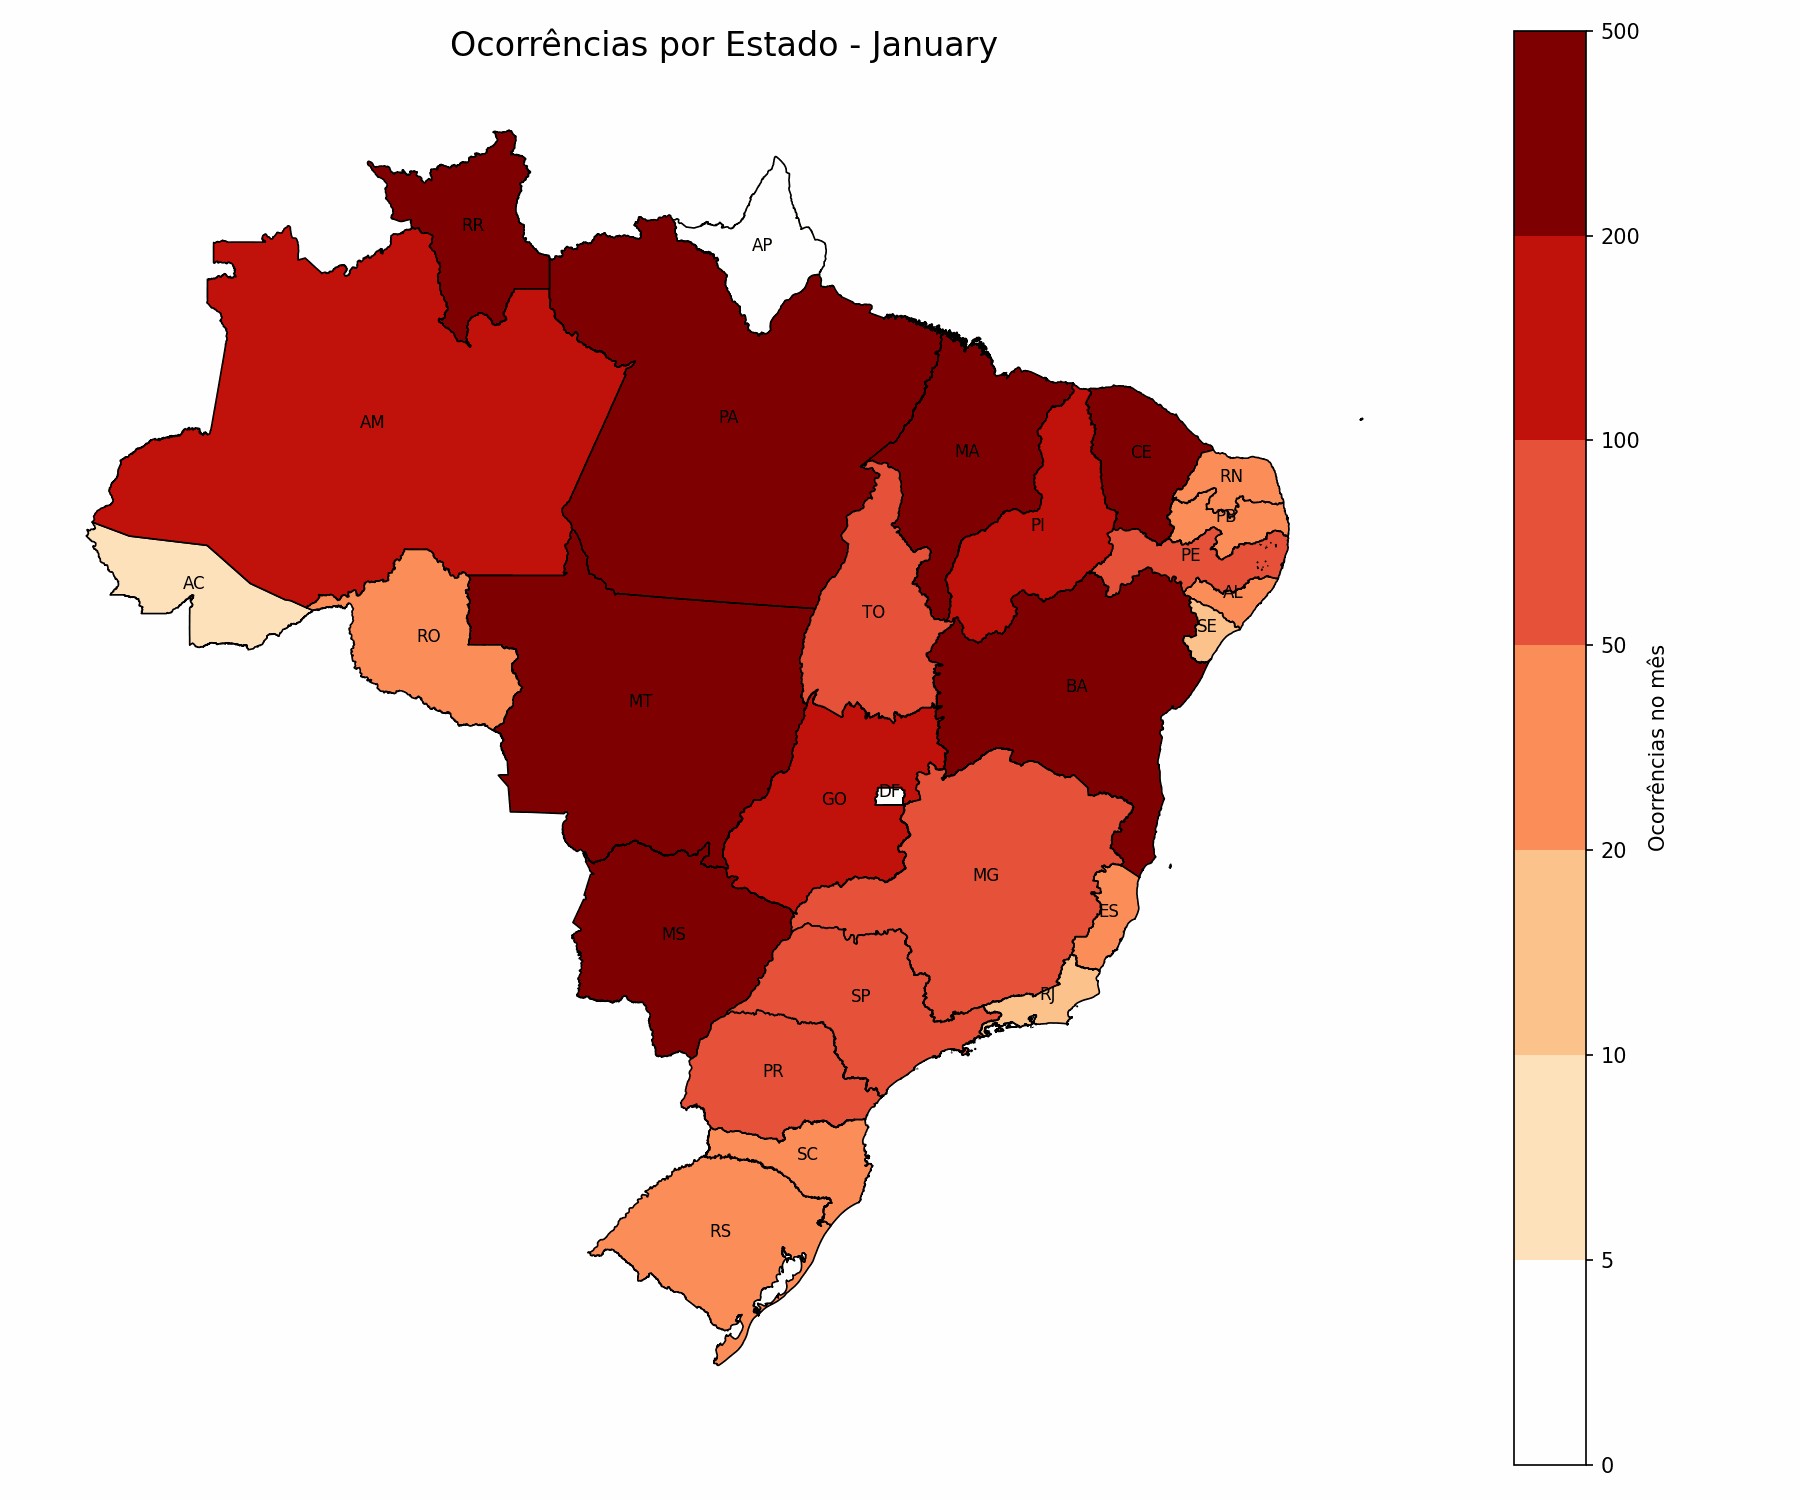

In [ ]:
from IPython.display import Image, display

# Exibir o GIF gerado
display(Image(filename="animacao_ocorrencias_2024.gif"))


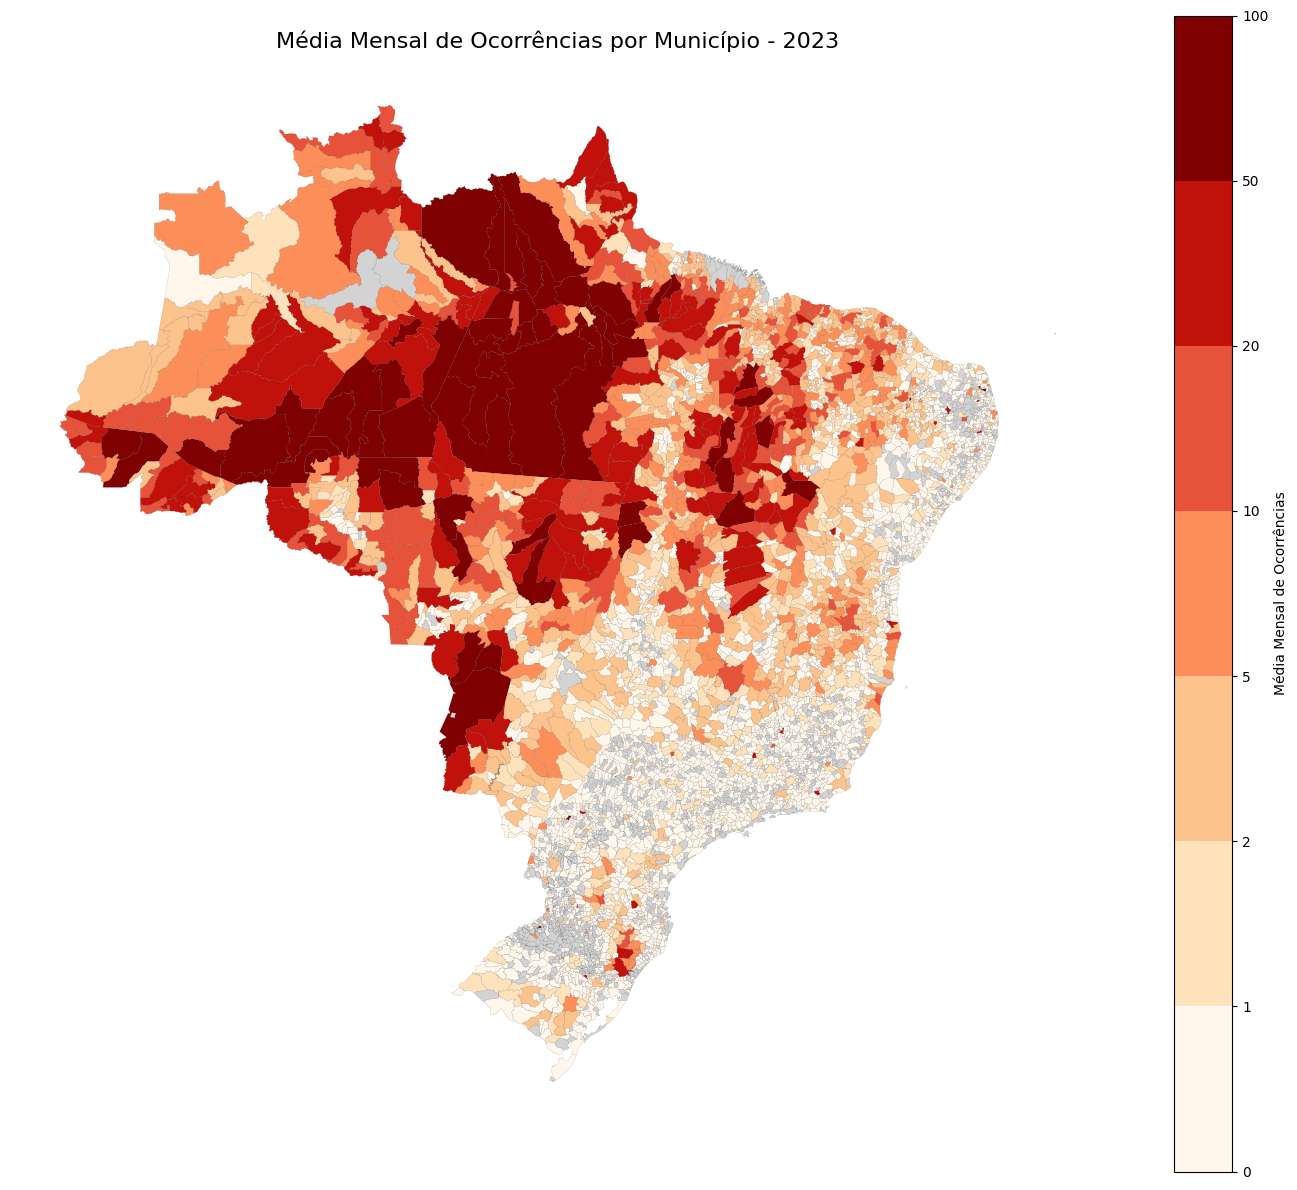

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# === 1. Carregar dados ===
rafi = bdqueimadas1
rafi['date'] = pd.to_datetime(rafi['date'])
rafi_2023 = rafi[rafi['date'].dt.year == 2023].copy()

# Carregar GeoJSON de municípios
municipios = municipios
municipios = municipios.to_crs(epsg=4326)

# Criar geometria dos pontos
rafi_2023['geometry'] = gpd.points_from_xy(rafi_2023['longitude'], rafi_2023['latitude'])
gdf = gpd.GeoDataFrame(rafi_2023, geometry='geometry', crs="EPSG:4326")

# Associar pontos aos municípios
gdf_mun = gpd.sjoin(gdf, municipios, how='inner', predicate='within')

# Coluna do nome do município
col_municipio = 'name' if 'name' in gdf_mun.columns else 'name'

# === 2. Calcular média mensal de ocorrências por município ===
media_mensal = (
    gdf_mun
    .groupby(col_municipio)['count']
    .sum()
    .div(12)  # média mensal
    .reset_index(name='media_mensal_count')
)

# Merge com geometria dos municípios
municipios_plot = municipios.merge(media_mensal, on=col_municipio, how='left')

# === 3. Plotar figura ===
fig, ax = plt.subplots(figsize=(14, 12))
norm = colors.BoundaryNorm(boundaries=[0, 1, 2, 5, 10, 20, 50, 100], ncolors=256)

municipios_plot.plot(column='media_mensal_count',
                     cmap='OrRd',
                     linewidth=0.05,
                     edgecolor='black',
                     legend=True,
                     norm=norm,
                     missing_kwds={'color': 'lightgrey', 'label': 'Sem dados'},
                     legend_kwds={'label': "Média Mensal de Ocorrências", 'orientation': "vertical"},
                     ax=ax)

ax.set_title("Média Mensal de Ocorrências por Município - 2023", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()


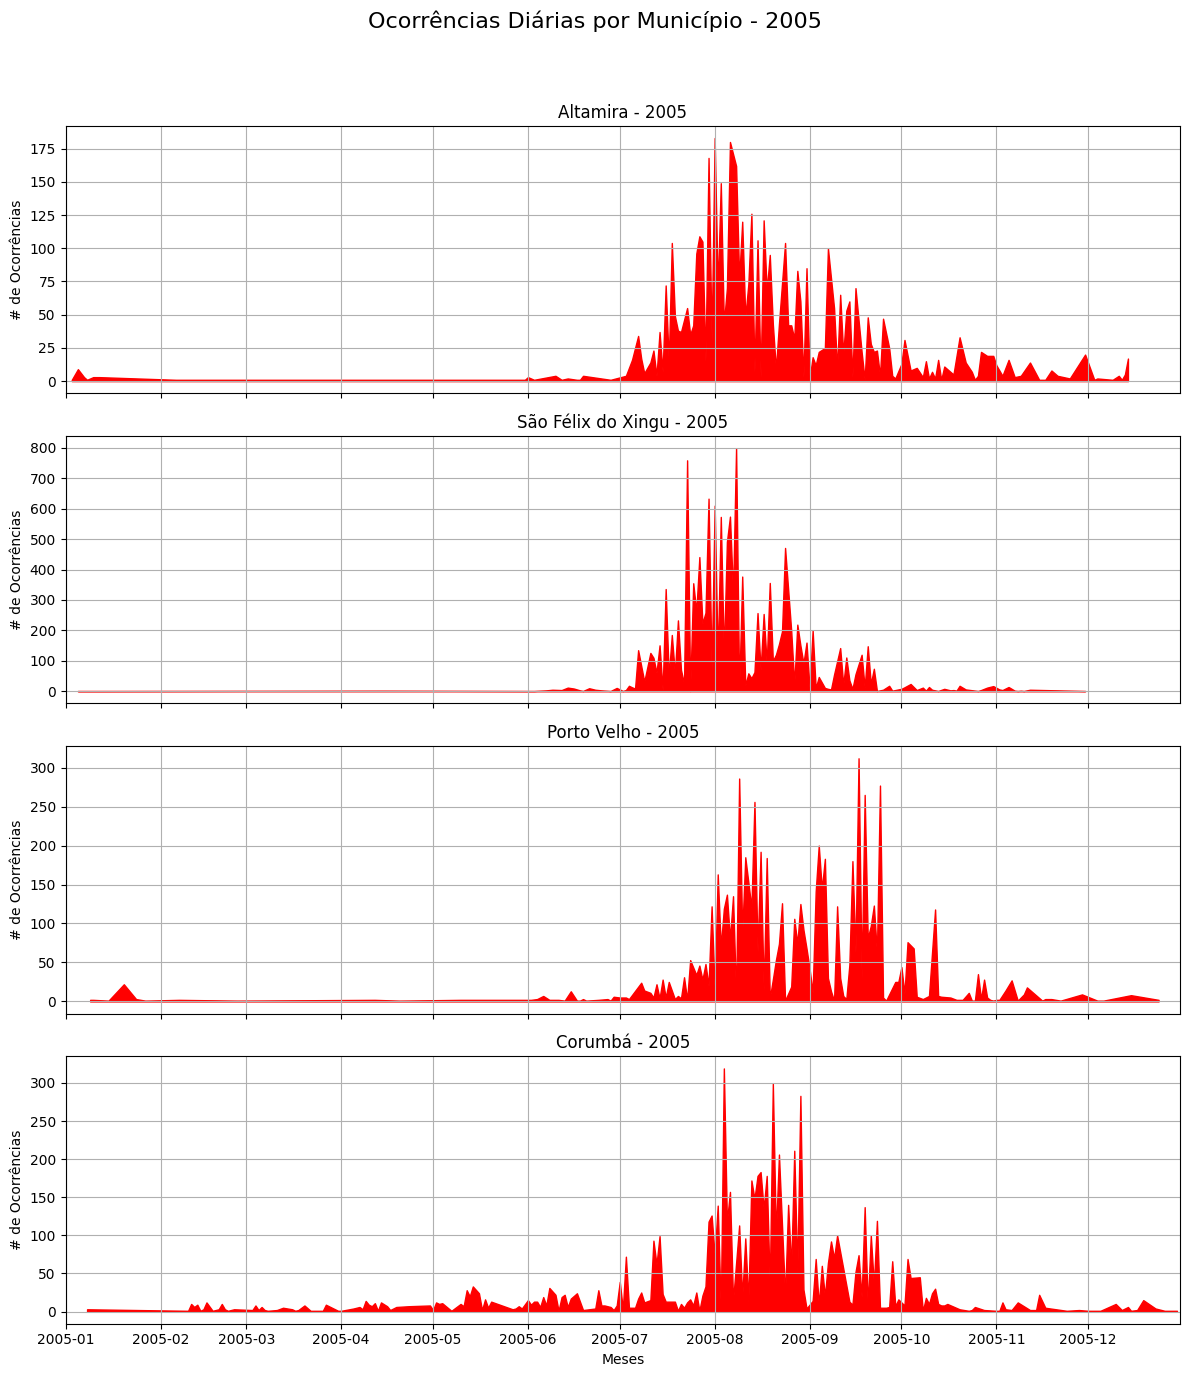

In [ ]:
# === 1. Parâmetros principais ===
ano_escolhido = 2005 # <-- Altere este valor para o ano desejado
municipios_alvo = ['Altamira', 'São Félix do Xingu', 'Porto Velho', 'Corumbá']

# === 2. Carregar os dados ===
rafi = bdqueimadas1
rafi['date'] = pd.to_datetime(rafi['date'])

# Carregar o GeoJSON dos municípios
municipios = municipios
col_nome_municipio = 'name'  # Verifique e ajuste se necessário

# Converter para GeoDataFrame
gdf = gpd.GeoDataFrame(rafi, geometry=gpd.points_from_xy(rafi.longitude, rafi.latitude), crs="EPSG:4326")

# Atribuir os municípios via spatial join
dados_com_municipio = gpd.sjoin(gdf, municipios, how="inner", predicate="within")

# Filtrar apenas o ano desejado e os municípios alvo
dados_com_municipio['year'] = dados_com_municipio['date'].dt.year
df_filtrado = dados_com_municipio[
    (dados_com_municipio['year'] == ano_escolhido) &
    (dados_com_municipio[col_nome_municipio].isin(municipios_alvo))
]

# === 3. Plotar os gráficos ===
fig, axes = plt.subplots(len(municipios_alvo), 1, figsize=(12, 3.5 * len(municipios_alvo)), sharex=True)

if len(municipios_alvo) == 1:
    axes = [axes]

for i, municipio in enumerate(municipios_alvo):
    dados = df_filtrado[df_filtrado[col_nome_municipio] == municipio]
    dados_agrupados = dados.groupby('date')['count'].sum().reset_index()

    ax = axes[i]
    ax.fill_between(dados_agrupados['date'], dados_agrupados['count'], color='red')
    ax.set_title(f"{municipio} - {ano_escolhido}")
    ax.set_ylabel("# de Ocorrências")
    ax.set_xlim(pd.Timestamp(f"{ano_escolhido}-01-01"), pd.Timestamp(f"{ano_escolhido}-12-31"))
    ax.grid(True)

axes[-1].set_xlabel("Meses")
plt.suptitle(f"Ocorrências Diárias por Município - {ano_escolhido}", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"ocorrencias_diarias_municipios_{ano_escolhido}.png", dpi=300)
plt.show()


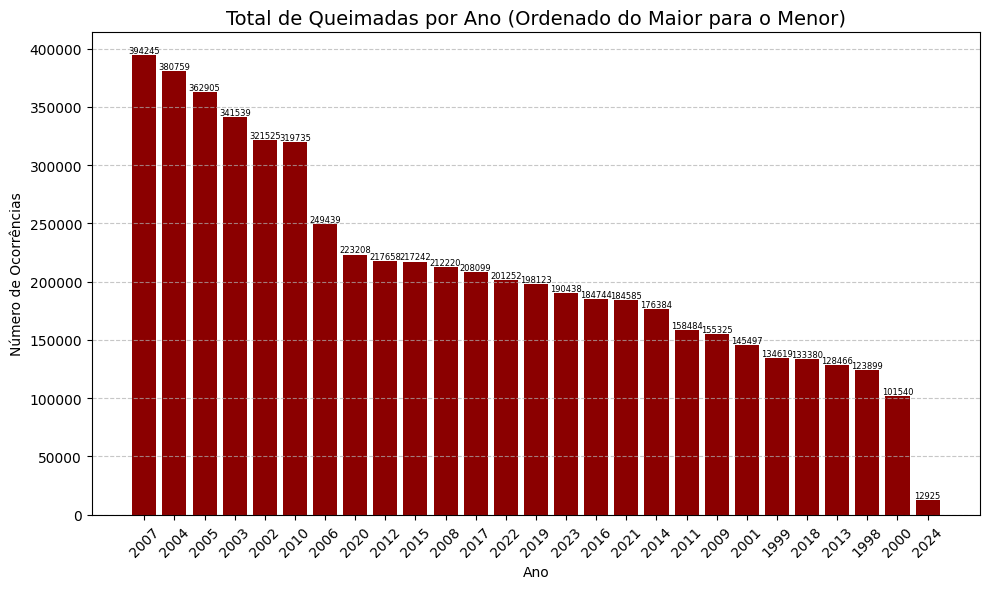

In [ ]:
# === 1. Carregar os dados ===
rafi = bdqueimadas1
rafi['date'] = pd.to_datetime(rafi['date'])
rafi['year'] = rafi['date'].dt.year

# === 2. Agrupar por ano ===
queimadas_por_ano = rafi.groupby('year')['count'].sum().reset_index()
queimadas_por_ano = queimadas_por_ano.sort_values(by='count', ascending=False)

# === 3. Plotar histograma ===
plt.figure(figsize=(10, 6))
bars = plt.bar(queimadas_por_ano['year'].astype(str), queimadas_por_ano['count'], color='darkred')

# Adicionar rótulos nos topos das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}',
             ha='center', va='bottom', fontsize=6)

# === 4. Estética ===
plt.title("Total de Queimadas por Ano (Ordenado do Maior para o Menor)", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Número de Ocorrências")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("queimadas_por_ano_histograma.png", dpi=300)
plt.show()


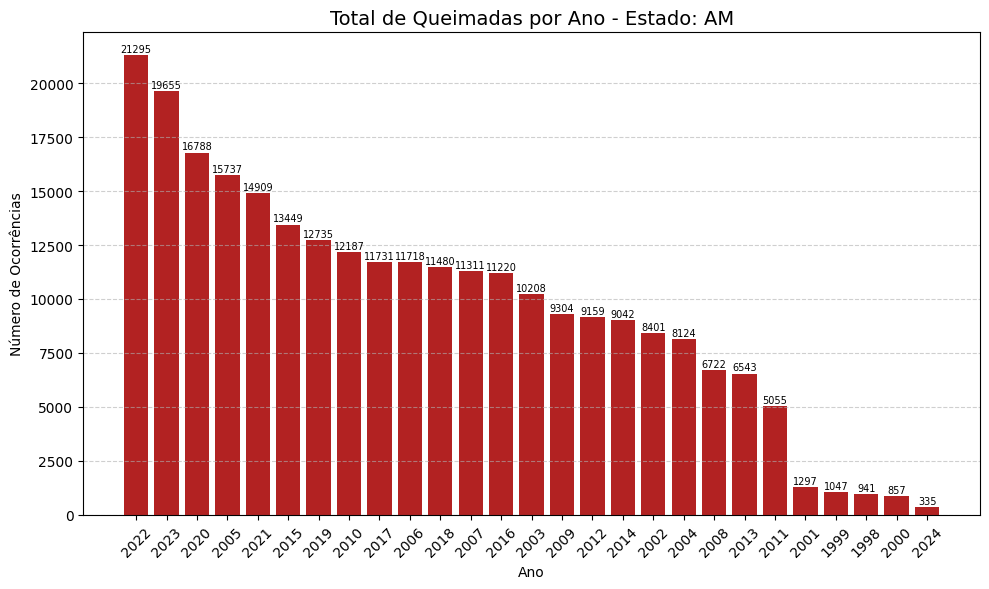

In [ ]:
# === 1. Carregar os dados ===
rafi = bdqueimadas1
rafi['date'] = pd.to_datetime(rafi['date'])
rafi['year'] = rafi['date'].dt.year

# === 2. Criar geometria dos pontos (latitude, longitude) ===
geometry = [Point(xy) for xy in zip(rafi['longitude'], rafi['latitude'])]
rafi_gdf = gpd.GeoDataFrame(rafi, geometry=geometry, crs="EPSG:4326")

# === 3. Carregar os estados do Brasil (GeoJSON) ===
estados = estados
estados = estados.to_crs("EPSG:4326")

# === 4. Realizar o join espacial entre os pontos e os estados ===
rafi_estados = gpd.sjoin(rafi_gdf, estados[['SIGLA', 'geometry']], how="inner", predicate='within')

# === 5. Filtrar por estado desejado ===
estado_alvo = 'AM'  # <- ALTERE AQUI
df_estado = rafi_estados[rafi_estados['SIGLA'] == estado_alvo]

# === 6. Agrupar por ano ===
queimadas_estado_ano = df_estado.groupby('year')['count'].sum().reset_index()
queimadas_estado_ano = queimadas_estado_ano.sort_values(by='count', ascending=False)

# === 7. Plotar histograma ===
plt.figure(figsize=(10, 6))
bars = plt.bar(queimadas_estado_ano['year'].astype(str), queimadas_estado_ano['count'], color='firebrick')

# Adicionar rótulos nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}',
             ha='center', va='bottom', fontsize=7)

plt.title(f"Total de Queimadas por Ano - Estado: {estado_alvo}", fontsize=14)
plt.xlabel("Ano")
plt.ylabel("Número de Ocorrências")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(f"queimadas_por_ano_{estado_alvo}.png", dpi=300)
plt.show()


In [ ]:
# 2. Lista de municípios de interesse (exatamente como aparecem no GeoJSON)
municipios_desejados = ['Apuí', 'São Félix do Xingu', 'Lábrea', 'Novo Progresso', 'Altamira', 'Itaituba']  # Substitua pelos nomes desejados


# Verifique o nome da coluna com o nome do município
print(municipios.columns)  # ex: 'NM_MUNICIP', 'name', etc.

# Supondo que a coluna seja 'NM_MUNICIP'
municipios_filtrados = municipios[municipios['name'].isin(municipios_desejados)]

# 4. Carregar os dados CSV
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# 5. Juntar os dados (spatial join)
gdf_com_municipios = gpd.sjoin(gdf, municipios_filtrados, how="inner", predicate="within")

# 6. Agrupar e somar
contagem_especifica = gdf_com_municipios.groupby('name').count()['count'].sort_values(ascending = True).nlargest(n=6)

# 7. Exibir o resultado
print("Total de casos por município selecionado:")
print(contagem_especifica)


Index(['id', 'name', 'description', 'geometry'], dtype='object')
Total de casos por município selecionado:
name
Apuí                  30
Altamira              29
Lábrea                12
São Félix do Xingu    10
Novo Progresso         9
Itaituba               6
Name: count, dtype: int64


<ipython-input-46-6feb6b160914>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


In [ ]:
# 2. Lista de municípios de interesse (exatamente como aparecem no GeoJSON)
municipios_desejados = ['Apuí', 'São Félix do Xingu', 'Lábrea', 'Novo Progresso', 'Altamira', 'Itaituba']  # Substitua pelos nomes desejados


# Verifique o nome da coluna com o nome do município
print(municipios.columns)  # ex: 'NM_MUNICIP', 'name', etc.

# Supondo que a coluna seja 'NM_MUNICIP'
municipios_filtrados = municipios[municipios['name'].isin(municipios_desejados)]

# 4. Carregar os dados CSV
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# 5. Juntar os dados (spatial join)
gdf_com_municipios = gpd.sjoin(gdf, municipios_filtrados, how="inner", predicate="within")

# 6. Agrupar e somar
contagem_especifica = gdf_com_municipios.groupby('name').count()['count'].sort_values(ascending = True).nlargest(n=6)

# 7. Exibir o resultado
print("Total de casos por município selecionado:")
print(contagem_especifica)

Index(['id', 'name', 'description', 'geometry'], dtype='object')
Total de casos por município selecionado:
name
Apuí                  30
Altamira              29
Lábrea                12
São Félix do Xingu    10
Novo Progresso         9
Itaituba               6
Name: count, dtype: int64


<ipython-input-48-6feb6b160914>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


In [ ]:
# 3. Carregar os dados por ano (como feito anteriormente)
df = bdqueimadas_2005


# 4. Criar geometria a partir de latitude e longitude
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# 5. Realizar a interseção espacial com os estados
gdf_com_estado = gpd.sjoin(gdf, estados, how="inner", predicate="within")

# 6. Criar uma pasta de saída
output_dir = "dados_por_estado"
os.makedirs(output_dir, exist_ok=True)

# 7. Separar por estado e salvar arquivos
for estado, grupo in gdf_com_estado.groupby('SIGLA'):  # 'name' depende do GeoJSON; pode ser 'NM_ESTADO', etc.
    output_path = os.path.join(output_dir, f"{estado}.csv")
    grupo.drop(columns='geometry').to_csv(output_path, index=False)
    print(f"Salvo: {output_path}")


<ipython-input-13-6b7942968b7c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)


Salvo: dados_por_estado/AC.csv
Salvo: dados_por_estado/AL.csv
Salvo: dados_por_estado/AM.csv
Salvo: dados_por_estado/AP.csv
Salvo: dados_por_estado/BA.csv
Salvo: dados_por_estado/CE.csv
Salvo: dados_por_estado/DF.csv
Salvo: dados_por_estado/ES.csv
Salvo: dados_por_estado/GO.csv
Salvo: dados_por_estado/MA.csv
Salvo: dados_por_estado/MG.csv
Salvo: dados_por_estado/MS.csv
Salvo: dados_por_estado/MT.csv
Salvo: dados_por_estado/PA.csv
Salvo: dados_por_estado/PB.csv
Salvo: dados_por_estado/PE.csv
Salvo: dados_por_estado/PI.csv
Salvo: dados_por_estado/PR.csv
Salvo: dados_por_estado/RJ.csv
Salvo: dados_por_estado/RN.csv
Salvo: dados_por_estado/RO.csv
Salvo: dados_por_estado/RR.csv
Salvo: dados_por_estado/RS.csv
Salvo: dados_por_estado/SC.csv
Salvo: dados_por_estado/SE.csv
Salvo: dados_por_estado/SP.csv
Salvo: dados_por_estado/TO.csv


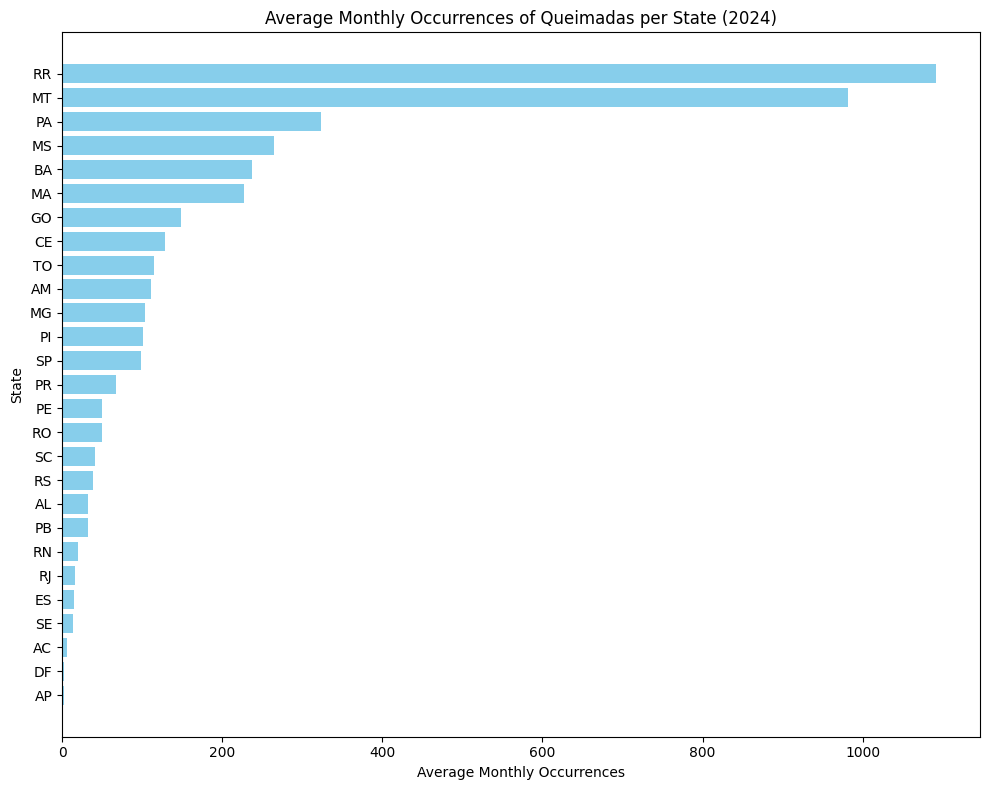

In [ ]:
import matplotlib.pyplot as plt

# Sort the data for better visualization
media_total_estado_sorted = media_total_estado.sort_values(by='media_mensal_count', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(media_total_estado_sorted['SIGLA'], media_total_estado_sorted['media_mensal_count'], color='skyblue')
plt.xlabel('Average Monthly Occurrences')
plt.ylabel('State')
plt.title('Average Monthly Occurrences of Queimadas per State (2024)')
plt.gca().invert_yaxis() # Invert y-axis to show the state with the highest average at the top
plt.tight_layout()
plt.show()